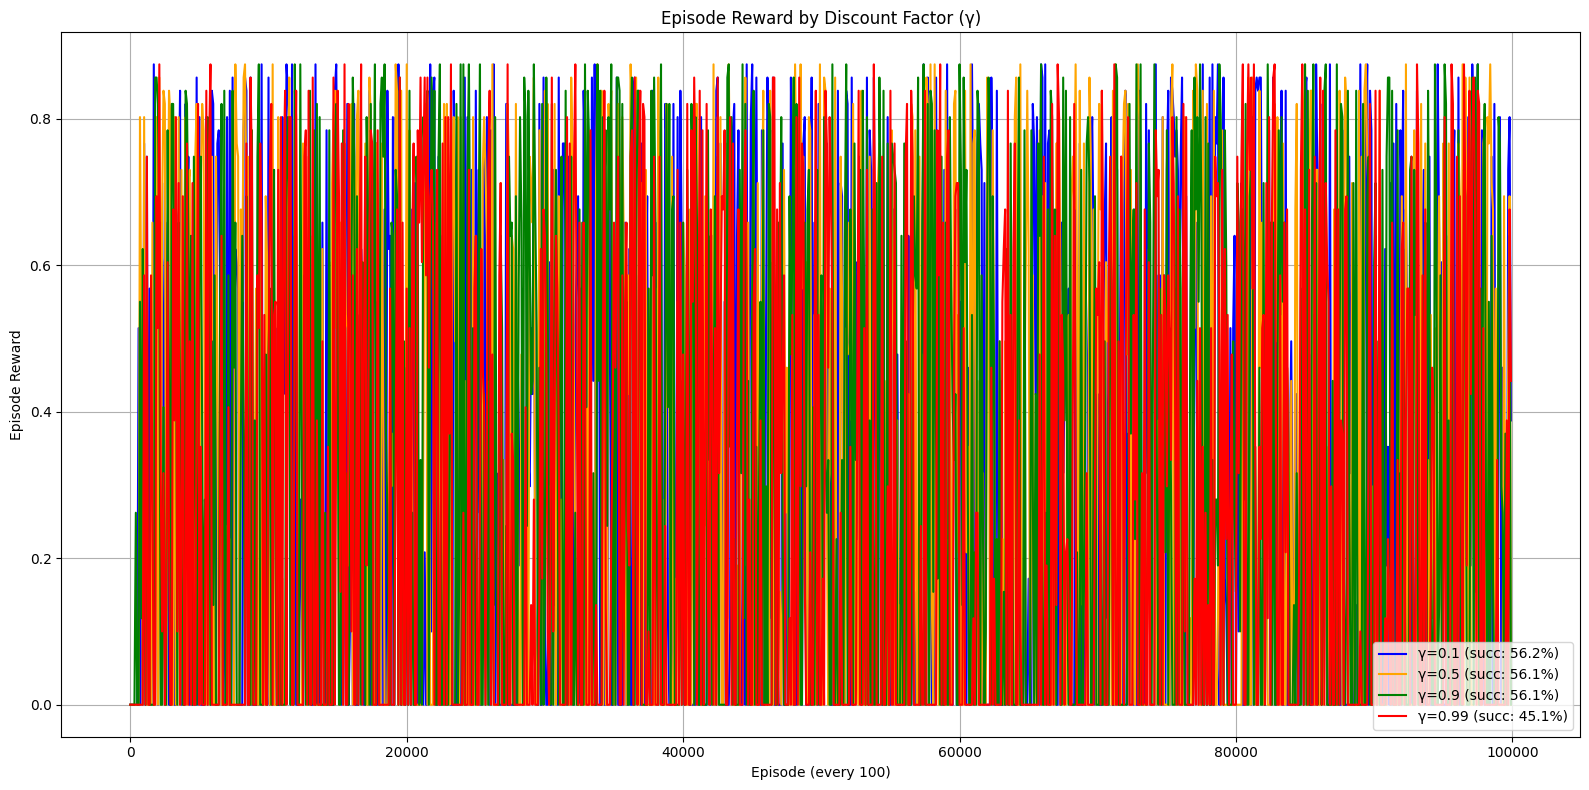

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 로그 불러오기
a_logs = pd.read_csv('./logs/rewards_q_gamma01.csv').iloc[:, 1]
b_logs = pd.read_csv('./logs/rewards_q_gamma05.csv').iloc[:, 1]
c_logs = pd.read_csv('./logs/rewards_q_gamma09.csv').iloc[:, 1]
d_logs = pd.read_csv('./logs/rewards_q_gamma99.csv').iloc[:, 1]

# 에피소드 인덱스
episodes = np.arange(len(a_logs))
step = 100
sample_idx = episodes[::step]

# 샘플링된 리워드
a_sample = a_logs[::step]
b_sample = b_logs[::step]
c_sample = c_logs[::step]
d_sample = d_logs[::step]

# 성공률 계산 (reward > 0)
def success_rate(logs):
    return (logs > 0).sum() / len(logs)

# 성공률을 legend에 포함
a_label = f"γ=0.1 (succ: {success_rate(a_logs)*100:.1f}%)"
b_label = f"γ=0.5 (succ: {success_rate(b_logs)*100:.1f}%)"
c_label = f"γ=0.9 (succ: {success_rate(c_logs)*100:.1f}%)"
d_label = f"γ=0.99 (succ: {success_rate(d_logs)*100:.1f}%)"

# 시각화
plt.figure(figsize=(16, 8))
plt.plot(sample_idx, a_sample, label=a_label, color='blue')
plt.plot(sample_idx, b_sample, label=b_label, color='orange')
plt.plot(sample_idx, c_sample, label=c_label, color='green')
plt.plot(sample_idx, d_sample, label=d_label, color='red')

plt.xlabel("Episode (every 100)")
plt.ylabel("Episode Reward")
plt.title("Episode Reward by Discount Factor (γ)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("gamma_ep_reward_with_success_legend.jpg", dpi=300)
plt.show()
